#**Environment Agency's Natural Flood Management - Data Challenge**

## Mount Drive, import packages, and download files

Mount Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


Import required packages

In [30]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from google_drive_downloader import GoogleDriveDownloader as gdd
import seaborn as sns
import folium
from folium import plugins

In [65]:
map = folium.Map(location=[52.03545, -1.6325])
map.fit_bounds([[51.9787, -1.8392], [52.0922, -1.4258]])

Download and unzip the data into Google Drive folder

If you prefer to download it manually and/or to your local environment, data is also available at:
https://drive.google.com/file/d/16STKJaKt_ipZZ6-4d7II9TO4eaia9agb/view?usp=sharing

In [18]:
gdd.download_file_from_google_drive(file_id='16STKJaKt_ipZZ6-4d7II9TO4eaia9agb',
                                    dest_path='/content/drive/My Drive/EA_hackathon/EA_files.zip', 
                                    showsize=True,
                                    unzip=True)

## Import data sets into dataframes and plot time series

Import data into Pandas dataframe

In [21]:
nfm_assets = pd.read_excel('/content/drive/My Drive/EA_hackathon/Shipston Assets 8.10 Cambridge snapshot (first 200 assets).xlsx',
                           header=1)
nfm_assets = nfm_assets.rename(columns={"x":"Longitude", "y":"Latitude"})

Explore data (5 top rows) 

In [39]:
nfm_assets.head()

,ObjectID,GlobalID,Select project,FR1_ProjectName,Asset ID:,Asset Type,Asset Description,Date Installed,Installed Cost (£),Watercourse Type,Stream Width (m),Land Drainage Consent Difficulty,Ecological Consent Difficulty,Average member length in Leaky Barrier (m),Wood Diameter (cm),Height of Leaky Barrier above bed (cm),Height of Leaky Barrier above bank (cm),Wood Species Used,Other Wood Species,Bund height (m),Bund width (m),Bund length (m),Bund Material,Gully Block Length (m),Gully Block Width (m),Gully Block Material,Soil Equipment or Technique Used,Flood Efficacy,FR3 Area Units,FR3_AreaRough,Storage Created (m3),FR3_AreaIncreasedLoss,Changed Flood Pathway?,Reduced Erosion?,Asset Condition,Date Assessed,Comments,CreationDate,Creator,EditDate,Editor,Longitude,Latitude
0,883,33059012-1c4d-43c7-adb7-496972f3c9b4,A017,Shipston,A017_2006151117,leaky_barriers,9,2020-06-02 11:00:00,1,ordinary,3.0,easy,n_a,5.0,20.0,30.0,0.0,willow_dead,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,moderate,ha,NaN,135.0,NaN,no,NaN,good,2020-06-15 11:00:00,NaN,2020-06-15 10:18:01,gsmithadmin,2020-08-03 11:44:52,NaN,-1.715078,52.069716
1,1066,02b90a36-d984-4b36-a299-4fbbe884f7b2,A017,Shipston,A017_2008051630,leaky_barriers,BLOCKPOTT*1,2020-08-05 11:00:00,260,ordinary,1.5,easy,n_a,3.0,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,moderate,ha,NaN,40.0,NaN,no,NaN,good,2020-06-29 23:00:00,Slatted,2020-08-05 16:44:24,NaN,2020-09-18 19:01:54,gsmithadmin,-1.732871,52.026232
2,1067,6f0e9956-8d95-4ebf-a540-9f0cabc735e9,A017,Shipston,A017_2008051627,leaky_barriers,BLOCKPOTT*2,2020-08-05 11:00:00,260,ordinary,1.5,easy,n_a,3.5,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,moderate,ha,NaN,30.0,NaN,no,NaN,good,2020-06-29 23:00:00,Slatted,2020-08-05 16:44:36,NaN,2020-09-18 19:02:03,gsmithadmin,-1.732574,52.026312
3,1068,a5d7435c-363e-41bf-ac2e-cea617acbfcd,A017,Shipston,A017_2008051625,leaky_barriers,BLOCKPOTT*3,2020-08-05 11:00:00,260,ordinary,1.5,easy,n_a,3.0,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,moderate,ha,NaN,25.0,NaN,no,NaN,good,2020-06-29 23:00:00,Slatted,2020-08-05 16:44:49,NaN,2020-09-18 19:02:11,gsmithadmin,-1.732450,52.026399
4,1069,01f0b340-5a4d-483d-91d0-7161b87d3ccb,A017,Shipston,A017_2008051622,leaky_barriers,BLOCKPOTT*4,2020-08-05 11:00:00,260,ordinary,2.0,easy,n_a,4.0,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,moderate,ha,NaN,30.0,NaN,no,NaN,good,2020-06-29 23:00:00,Slatted,2020-08-05 16:45:02,NaN,2020-09-18 19:02:50,gsmithadmin,-1.732442,52.026492


### Plot all NFM assets, colour by asset type and insert storage capacity into the popup.

In [70]:
asset_types = list(nfm_assets['Asset Type'].unique())
colours = ['red', 'blue', 'green', 'purple', 'orange', 'black']
colour_assigns = dict(zip(asset_types, colours))

for idx, row in nfm_assets.iterrows():
  asset_type = row['Asset Type']
  storage_amount = row['Storage Created (m3)']
  folium.Marker([row.Latitude, row.Longitude],
                popup=f'Storage Created: {storage_amount} (m3)',
                tooltip=f'Asset Type: {asset_type}',
                icon=folium.Icon(color=colour_assigns[asset_type])).add_to(map)

In [71]:
map

In [73]:
map.save('shipton_map.html')

### List which attributes have missing values:

In [72]:
for col in nfm_assets:
  print(f'Name: {col}, Missing Values: {nfm_assets[col].isna().sum()}')

Name: ObjectID, Missing Values: 0
Name: GlobalID, Missing Values: 0
Name: Select project, Missing Values: 0
Name: FR1_ProjectName, Missing Values: 0
Name: Asset ID:, Missing Values: 0
Name: Asset Type, Missing Values: 0
Name: Asset Description, Missing Values: 0
Name: Date Installed, Missing Values: 0
Name: Installed Cost (£), Missing Values: 0
Name: Watercourse Type, Missing Values: 5
Name: Stream Width (m), Missing Values: 42
Name: Land Drainage Consent Difficulty, Missing Values: 10
Name: Ecological Consent Difficulty, Missing Values: 13
Name: Average member length in Leaky Barrier (m), Missing Values: 41
Name: Wood Diameter (cm), Missing Values: 66
Name: Height of Leaky Barrier above bed (cm), Missing Values: 44
Name: Height of Leaky Barrier above bank (cm), Missing Values: 115
Name: Wood Species Used, Missing Values: 170
Name: Other Wood Species, Missing Values: 190
Name: Bund height (m), Missing Values: 194
Name: Bund width (m), Missing Values: 194
Name: Bund length (m), Missing 

# OLD CODE BELOW

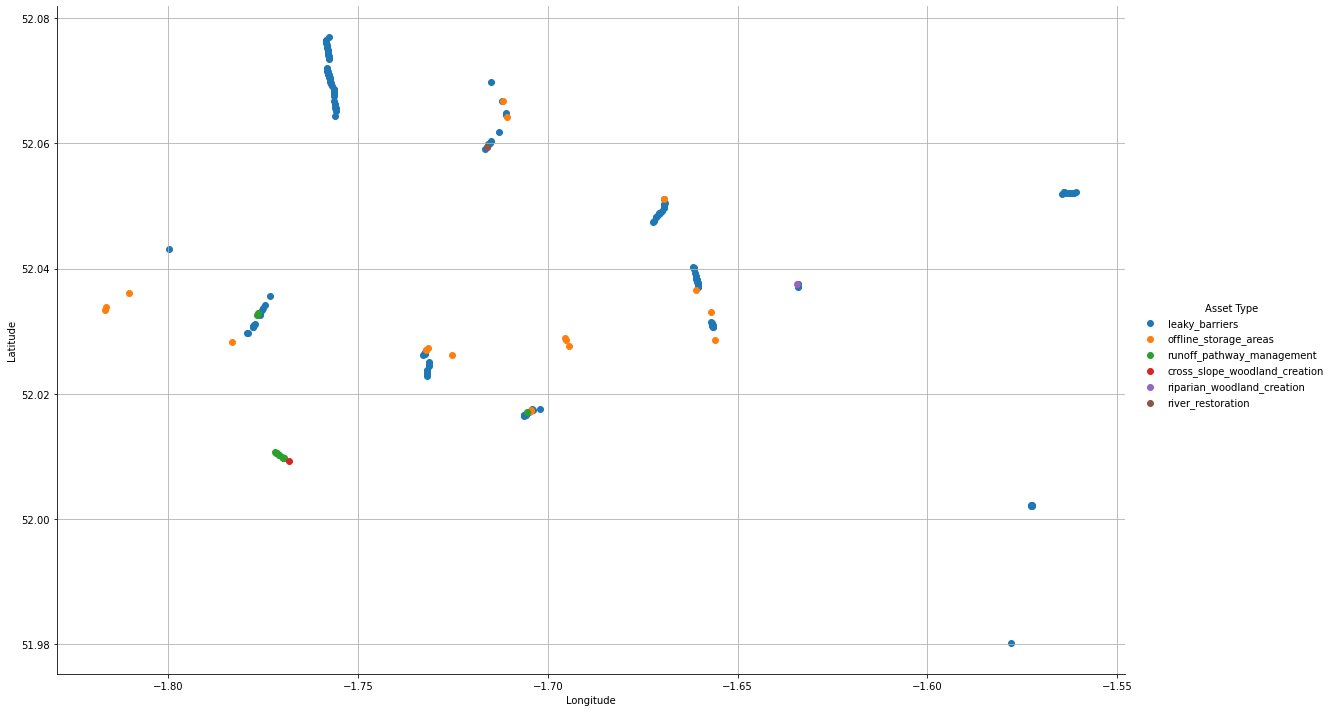

In [23]:
_assets = list(nfm_assets['Asset Type'].unique())
fg = sns.FacetGrid(data=nfm_assets, hue='Asset Type', hue_order=_assets, height=10, aspect=1.6)
fg.map(plt.scatter, 'Longitude', 'Latitude').add_legend()
plt.grid(True)

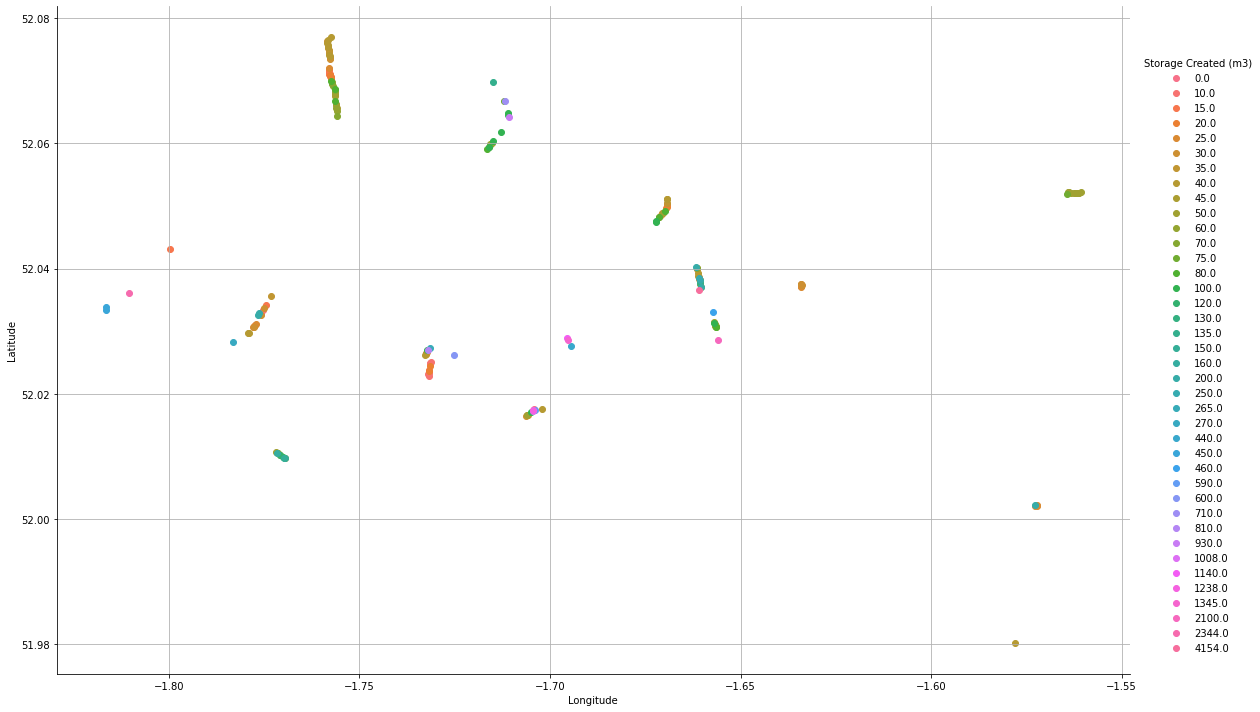

In [ ]:
geo_storage = geo_df.dropna(subset=['Storage Created (m3)'])
_assets = sorted(list(geo_storage['Storage Created (m3)'].unique()))
fg = sns.FacetGrid(data=geo_storage, hue='Storage Created (m3)', hue_order=_assets, height=10, aspect=1.6)
fg.map(plt.scatter, 'Longitude', 'Latitude').add_legend()
plt.grid(True)

In [ ]:
geo_df = geo_df.to_crs(epsg=3857)

AttributeError: ignored

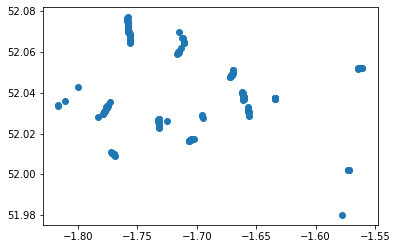

In [ ]:
ax = plt.scatter(geo_df['Longitude'], geo_df['Latitude'])
ctx.add_basemap(ax)